In [1]:
from database.market import Market
import pandas as pd
from tqdm import tqdm
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [2]:
market = Market()

In [3]:
market.connect()
sp500 = market.retrieve("sp500")
prices = market.retrieve("prices")
market.disconnect()

In [4]:
prices["date"] = pd.to_datetime(prices["date"])

In [5]:
prices.columns

Index(['_id', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor',
       'ticker'],
      dtype='object')

In [6]:
prices["date"].min()

Timestamp('1994-01-03 00:00:00+0000', tz='UTC')

In [21]:
final = []
for ticker in tqdm(sp500["Symbol"]):
    ticker_data = prices[prices["ticker"]==ticker]
    ticker_data["rolling"] = ticker_data["adjClose"].rolling(window=100).mean()
    ticker_data["gain"] = (ticker_data["rolling"] - ticker_data["adjClose"]) / ticker_data["adjClose"]
    final.append(ticker_data)

  0%|                                                                                                                                              | 0/505 [00:00<?, ?it/s]C:\Users\ericj\AppData\Local\Temp/ipykernel_15180/3989271373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data["rolling"] = ticker_data["adjClose"].rolling(window=100).mean()
C:\Users\ericj\AppData\Local\Temp/ipykernel_15180/3989271373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data["gain"] = (ticker_data["rol

In [22]:
sim = pd.concat(final)
sim.dropna(inplace=True)

In [23]:
sim["year"] = [x.year for x in sim["date"]]

In [24]:
start = sim[sim["year"] == 2013].iloc[0]["date"]
end = sim["date"].max()
delta_range = range(0,20,5)
trades = []
for delta in tqdm(delta_range):
    date = start
    d = float(delta/100)
    while date < end:
        try:
            if date.weekday() > 4:
                date = date + timedelta(days=1)
            else:
                todays_sim = sim[(sim["date"]==date) & (sim["gain"]<0)]
                if todays_sim.index.size > 1:
                    offering = todays_sim.sort_values("gain").iloc[0]
                    trade = offering[["date","adjClose","ticker"]]
                    ticker = trade["ticker"]
                    buy_date = trade["date"]
                    buy_price = trade["adjClose"]
                    exits = sim[(sim["ticker"]==ticker) & (sim["date"]>trade["date"])].copy()
                    exits["delta"] = (exits["adjClose"] - buy_price) / buy_price
                    exit = exits[exits["delta"]>d].iloc[0]
                    if exit.index.size < 1:
                        exit = exits[exits["year"]==buy_date.year].sort_values("date").iloc[0]
                    trade["sell_price"] = exit["adjClose"]
                    trade["sell_date"] = exit["date"]
                    trade["d"] = d
                    trades.append(trade)
                    date = trade["sell_date"] + timedelta(days=1)
                else:
                    date = date + timedelta(days=1)
        except Exception as e:
            print(str(e))
            date = date + timedelta(days=1)

  0%|                                                                                                                                                | 0/4 [00:00<?, ?it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 25%|██████████████████████████████████                                                                                                      | 1/4 [00:41<02:04, 41.58s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 50%|████████████████████████████████████████████████████████████████████                                                                    | 2/4 [01:13<01:12, 36.10s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 3/4 [01:37<00:30, 30.22s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:48<00:00, 27.14s/it]

single positional indexer is out-of-bounds


In [25]:
analysis = pd.DataFrame(trades)

In [26]:
analysis["gain"] = (analysis["sell_price"] - analysis["adjClose"]) / analysis["adjClose"]

In [27]:
heh = []
a = []
for d in analysis["d"].unique():
    delta_trades = analysis[analysis["d"]==d].sort_values("date")
    initial = 100
    cash = []
    for gain in delta_trades["gain"]:
        initial = initial * (1+gain)
        cash.append(initial)
    delta_trades["cash"] = cash
    da = {}
    da["pv"] = cash[-1]
    da["trades"] = delta_trades.index.size
    da["avg_gain"] = delta_trades["gain"].mean()
    da["d"] = d
    a.append(da)
    heh.append(delta_trades)

In [28]:
final = pd.DataFrame(a).sort_values("pv",ascending=False)

In [29]:
final

,pv,trades,avg_gain,d
1,82537.427979,83,0.085521,0.05
2,62184.612247,50,0.138869,0.10
3,2887.664593,18,0.209564,0.15
0,2002.278941,118,0.025955,0.00


In [30]:
visual = pd.concat(heh)
visual["hpr"] = visual["sell_date"]- visual["date"]
visual["hpr"] = [x.days for x in visual["hpr"]]

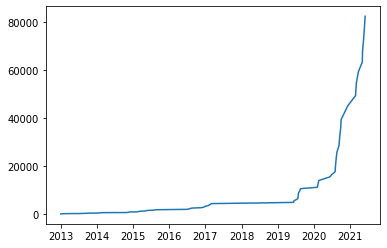

In [31]:
wow = final.iloc[0]
test = visual[visual["d"] == wow["d"]]
plt.plot(test["date"],test["cash"])

In [32]:
visual["year"] = [x.year for x in visual["date"]]
visual[visual["d"]==wow["d"]].sort_values("date",ascending=True).head(50)

,date,adjClose,ticker,sell_price,sell_date,d,gain,cash,hpr,year
1896552,2013-01-02 00:00:00+00:00,13.144273,NFLX,14.171472,2013-01-07 00:00:00+00:00,0.05,0.078148,107.814803,5,2013
1896556,2013-01-08 00:00:00+00:00,13.879458,NFLX,14.777842,2013-01-14 00:00:00+00:00,0.05,0.064728,114.793403,6,2013
1896561,2013-01-15 00:00:00+00:00,14.527128,NFLX,20.979979,2013-01-24 00:00:00+00:00,0.05,0.444193,165.783844,9,2013
1896568,2013-01-25 00:00:00+00:00,24.222833,NFLX,26.344259,2013-02-06 00:00:00+00:00,0.05,0.087580,180.303130,12,2013
1896577,2013-02-07 00:00:00+00:00,25.994545,NFLX,28.064258,2013-02-19 00:00:00+00:00,0.05,0.079621,194.659049,12,2013
1896585,2013-02-20 00:00:00+00:00,26.731402,NFLX,30.998540,2013-04-23 00:00:00+00:00,0.05,0.159630,225.732509,62,2013
2735233,2013-04-24 00:00:00+00:00,81.050000,VRTX,87.790000,2013-07-12 00:00:00+00:00,0.05,0.083159,244.504096,79,2013
2551051,2013-07-15 00:00:00+00:00,25.452000,TSLA,26.924000,2013-07-29 00:00:00+00:00,0.05,0.057834,258.644832,14,2013
2551062,2013-07-30 00:00:00+00:00,26.348000,TSLA,28.936000,2013-08-05 00:00:00+00:00,0.05,0.098224,284.049904,6,2013
2551067,2013-08-06 00:00:00+00:00,28.430000,TSLA,30.696000,2013-08-08 00:00:00+00:00,0.05,0.079705,306.689970,2,2013


In [33]:
today = sim[sim["date"]==sim["date"].max()][["date","adjClose","ticker","gain","rolling"]].sort_values("gain").head(20).merge(sp500[["Symbol","GICS Sector"]].rename(columns={"Symbol":"ticker"}),on="ticker")

In [34]:
today[["date","GICS Sector","ticker","rolling","adjClose","gain"]]

,date,GICS Sector,ticker,rolling,adjClose,gain
0,2021-08-24 00:00:00+00:00,Materials,ALB,176.652118,229.20,-0.229267
1,2021-08-24 00:00:00+00:00,Information Technology,PAYC,377.776100,485.58,-0.222011
2,2021-08-24 00:00:00+00:00,Information Technology,MPWR,379.783314,485.33,-0.217474
3,2021-08-24 00:00:00+00:00,Materials,NUE,97.641870,123.25,-0.207774
4,2021-08-24 00:00:00+00:00,Information Technology,FTNT,238.418500,299.84,-0.204848
5,2021-08-24 00:00:00+00:00,Information Technology,IT,240.463900,300.97,-0.201037
6,2021-08-24 00:00:00+00:00,Health Care,WST,357.982008,445.88,-0.197134
7,2021-08-24 00:00:00+00:00,Information Technology,NVDA,175.206973,217.93,-0.196040
8,2021-08-24 00:00:00+00:00,Consumer Discretionary,CMG,1555.253900,1920.52,-0.190191
9,2021-08-24 00:00:00+00:00,Health Care,REGN,542.568300,669.95,-0.190136
